<a href="https://colab.research.google.com/github/Dimildizio/DArc_course/blob/main/EDA/PimaKaggle/Pima_indians_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima indians diabetes kaggle dataset

### import libs

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [21]:
%matplotlib inline

### download dataset

In [6]:
%%capture
!wget -O pima.csv https://raw.githubusercontent.com/Dimildizio/DArc_course/main/EDA/PimaKaggle/pima-indians-diabetes.csv

In [66]:
columns = ['pregnancies','glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'BMI', 'Pedigree', 'Age', 'Result']
data = pd.read_csv('pima.csv', names = columns)
data.head()

,pregnancies,glucose,blood_presure,skin_thickness,insulin,BMI,Pedigree,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the size of the dataset

In [67]:
data.shape

(768, 9)

### Check for NaNs and data types

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_presure   768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Pedigree        768 non-null    float64
 7   Age             768 non-null    int64  
 8   Result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Convert float\int 64 to 32 for faster operatinos

In [69]:
for col in data.columns:
  if data[col].dtype == 'float64':
    data[col] = data[col].astype('float32')

  elif data[col].dtype == 'int64':
    data[col] = data[col].astype('int32')

### Get statistics by columns

In [19]:
pd.set_option('display.precision', 3)
data.describe()

,pregnancies,glucose,blood_presure,skin_thickness,insulin,BMI,Pedigree,Age,Result
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


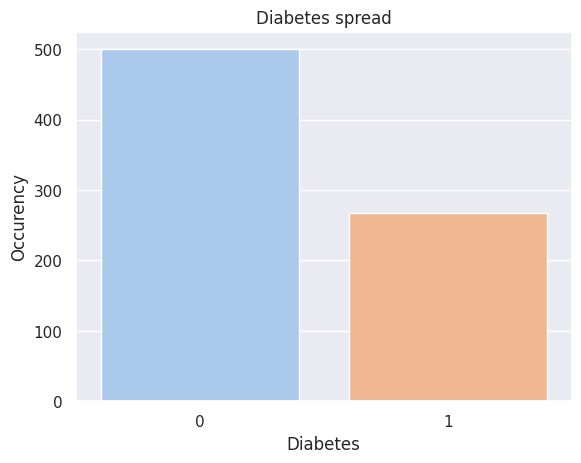

In [44]:
sns.set(style="darkgrid")
sns.set_palette('pastel')
sns.countplot(data=data, x='Result')

plt.title('Diabetes spread')
plt.xlabel('Diabetes')
plt.ylabel('Occurency')
plt.show()

Not ideal distibution, so we'll have to address this issue later, possibly by adding sythetic rows.

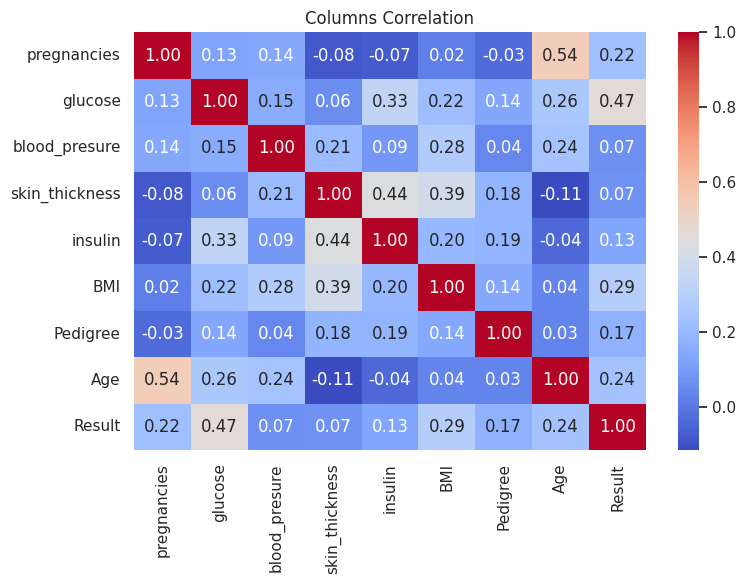

In [70]:
plt.figure(figsize=(8,6))

corr_matrix = data.corr()
sns.heatmap(data=corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm')
plt.title('Columns Correlation')
plt.tight_layout()

Clearly a very "combed" dataset. No NaNs, no high correlation

### Check for skewness

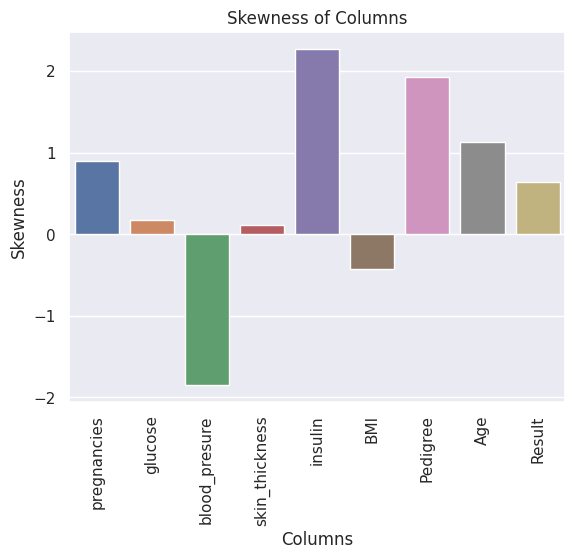

In [73]:
skewness = data.skew()
sns.barplot(x=skewness.index, y=skewness)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.show()

### Plot distribution and density curve

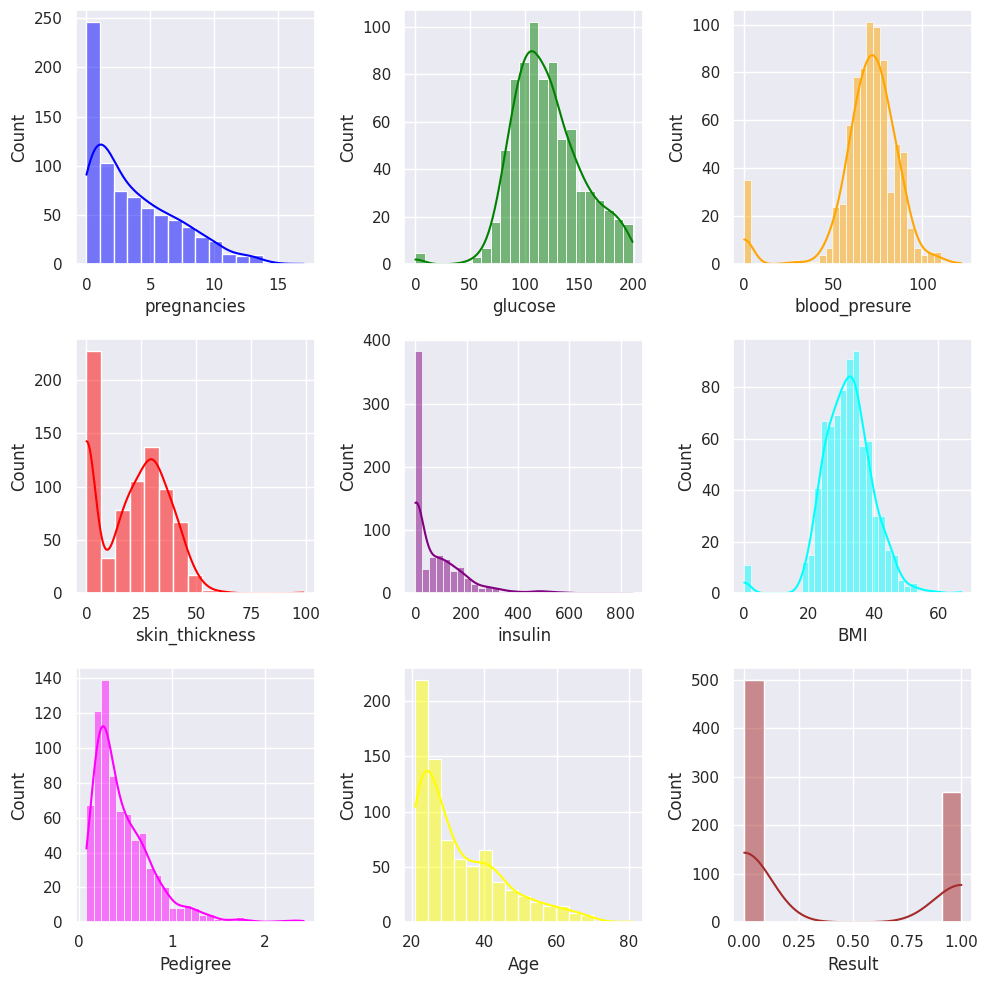

In [85]:
n = 3
fig, axes = plt.subplots(n, n, figsize=(10,10))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'brown']

for num, column in enumerate(data.columns):
  row = num // n
  col = num % n
  ax = axes[row, col]
  sns.histplot(data[column], kde=True, color=colors[num], ax=ax)
plt.tight_layout()
plt.show()

Looks like we got some outliers as well as some BMI, skin_thickness, insulin, blood_pressure and glucose values 0 which is not possible.

### Check which rows (suspicious) got 0 as values

In [109]:
data[(data['insulin']==0) | (data['BMI']==0) | (data['skin_thickness']==0) | (data['blood_presure']==0) | (data['glucose']==0)]

,pregnancies,glucose,blood_presure,skin_thickness,insulin,BMI,Pedigree,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


It also seems that for the half of the dataset the parameters haven't been taken and empty values have been filled with 0.
Also if we remove all cols but insulin, it will leave us with the same 374 out of 376 with missing data (extra ones go for glucose and BMI each).